In [140]:
import pandas as pd
import numpy as np
pd.set_option("display.show_dimensions", False)
pd.set_option("display.float_format", "{:4.3g}".format)

# Pandas-方便的数据分析库

In [2]:
import pandas as pd
pd.__version__

'0.16.2'

## Pandas中的数据对象

### `Series`对象

Series 对象同时拥有数组和字典的功能

In [38]:
s = pd.Series([1, 2, 3, 4, 5], index=["a", "b", "c", "d", "e"])
print u"　索引:", s.index
print u"值数组:", s.values
s

　索引: Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')
值数组: [1 2 3 4 5]


a    1
b    2
c    3
d    4
e    5
dtype: int64

In [4]:
print u"位置下标   s[2]:", s[2]
print u"标签下标 s['d']:", s['d']

位置下标   s[2]: 3
标签下标 s['d']: 4


In [5]:
%C 5 s[1:3]; s['b':'d']

   s[1:3]         s['b':'d'] 
------------     ------------
b    2           b    2      
c    3           c    3      
dtype: int64     d    4      
                 dtype: int64


In [6]:
%C 5 s[[1,3,2]]; s[['b','d','c']]  # 位置列表和标签列表

 s[[1,3,2]]      s[['b','d','c']]  # 位置列表和标签列表
------------     -----------------------------
b    2           b    2                       
d    4           d    4                       
c    3           c    3                       
dtype: int64     dtype: int64                 


In [7]:
list(s.iteritems()) 

[('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5)]

In [11]:
s2 = pd.Series([20,30,40,50,60], index=["b","c","d","e","f"])
%C 5 s; s2; s+s2

     s                s2               s+s2     
------------     ------------     --------------
a    1           b    20          a    nan      
b    2           c    30          b     22      
c    3           d    40          c     33      
d    4           e    50          d     44      
e    5           f    60          e     55      
dtype: int64     dtype: int64     f    nan      
                                  dtype: float64


### `DataFrame`对象

#### `DataFrame`的各个组成元素

从文件创建DataFrame对象

In [22]:
df_soil = pd.read_csv("data/Soils-simple.csv", index_col=[0, 1], parse_dates=["Date"])
df_soil.columns.name = "Measures"

In [37]:
df_soil

Measures           pH  Dens   Ca  Conduc       Date   Name
Depth Contour                                             
0-10  Depression  5.4  0.98   11     1.5 2015-05-26   Lois
      Slope       5.5   1.1   12       2 2015-04-30    Roy
      Top         5.3     1   13     1.4 2015-05-21    Roy
10-30 Depression  4.9   1.4  7.5     5.5 2015-03-21   Lois
      Slope       5.3   1.3  9.5     4.9 2015-02-06  Diana
      Top         4.8   1.3   10     3.6 2015-04-11  Diana

DataFrame 对象的类型, 也就是每一列的类型

In [88]:
df_soil.dtypes # 列名就是索引， PH 既是列名又是索引，它属于索引对象Index中的元素

Measures
pH               float64
Dens             float64
Ca               float64
Conduc           float64
Date      datetime64[ns]
Name              object
dtype: object

DataFrame 对象有shape属性

In [24]:
df_soil.shape

(6, 6)

DataFrame的index属性保存行索引, columns属性保存列索引

In [28]:
# 区分DataFrame的列和列名
print df_soil.columns
print df_soil.columns.name

Index([u'pH', u'Dens', u'Ca', u'Conduc', u'Date', u'Name'], dtype='object', name=u'Measures')
Measures


In [29]:
print df_soil.index# level: 两级行索引 labels: 及其对应的整数表示
print df_soil.index.names # 行索引名

MultiIndex(levels=[[u'0-10', u'10-30'], [u'Depression', u'Slope', u'Top']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[u'Depth', u'Contour'])
[u'Depth', u'Contour']


[]: 通过列索引标签获得指定的列

In [35]:
df_soil["pH"]

Depth  Contour   
0-10   Depression    5.4
       Slope         5.5
       Top           5.3
10-30  Depression    4.9
       Slope         5.3
       Top           4.8
Name: pH, dtype: float64

In [36]:
 df_soil[["Dens", "Ca"]]

Measures          Dens   Ca
Depth Contour              
0-10  Depression  0.98   11
      Slope        1.1   12
      Top            1   13
10-30 Depression   1.4  7.5
      Slope        1.3  9.5
      Top          1.3   10

.loc[]: 通过行索引标签获得指定的行

In [33]:
df_soil.loc["0-10", "Top"]

Measures
pH                        5.3
Dens                        1
Ca                         13
Conduc                    1.4
Date      2015-05-21 00:00:00
Name                      Roy
Name: (0-10, Top), dtype: object

In [34]:
df_soil.loc["10-30"]

Measures,pH,Dens,Ca,Conduc,Date,Name
Contour,,,,,,
Depression,4.9,1.4,7.5,5.5,2015-03-21,Lois
Slope,5.3,1.3,9.5,4.9,2015-02-06,Diana
Top,4.8,1.3,10,3.6,2015-04-11,Diana


In [65]:
df_soil.values.dtype

dtype('O')

#### 将内存中的数据转换为`DataFrame`对象

二维数组(或者能转化为二维数组的列表)做DataFrame的值, index和columns指定行列索引

字典的键做 DataFrame对象的列索引, 字典的值做DataFrame的值, index指定行索引

由dtype定义的元组列表, 做结构数组的框架, 做DataFrame的框架, 其他的元组列表做DataFrame的值

In [40]:
df1 = pd.DataFrame(np.random.randint(0, 10, (4, 2)), #
                   index=["A", "B", "C", "D"], 
                   columns=["a", "b"])

df2 = pd.DataFrame({"a":[1, 2, 3, 4], "b":[5, 6, 7, 8]},  #
                   index=["A", "B", "C", "D"])

arr = np.array([("item1", 1), ("item2", 2), ("item3", 3), ("item4", 4)], 
               dtype=[("name", "10S"), ("count", int)])

df3 = pd.DataFrame(arr) #

%C 6 df1; df2; df3

  df1          df2              df3      
-------      -------      ---------------
   a  b         a  b          name  count
A  9  4      A  1  5      0  item1      1
B  9  4      B  2  6      1  item2      2
C  4  4      C  3  7      2  item3      3
D  0  6      D  4  8      3  item4      4


from_dict()将字典转化为数据表对象

In [51]:
dict1 = {"a":[1, 2, 3], "b":[4, 5, 6]}
# 字典的键默认做数据表的列索引(df1的形式), 行索引用整数表示
# 无无指定的索引用整数表示行号或者列号

df1 = pd.DataFrame.from_dict(dict1, orient="columns")
df2 = pd.DataFrame.from_dict(dict1, orient="index")

In [52]:
df1

,a,b
0,1,4
1,2,5
2,3,6


In [53]:
df2

,0,1,2
a,1,2,3
b,4,5,6


In [55]:
# 从嵌套字典创建数据表
dict2 = {"a":{"A":1, "B":2}, "b":{"A":3, "C":4}}
df3 = pd.DataFrame.from_dict(dict2, orient="columns")
df4 = pd.DataFrame.from_dict(dict2, orient="index")

In [56]:
df3

,a,b
A,1,3
B,2,nan
C,nan,4


In [57]:
df4

,A,B,C
a,1,2,nan
b,3,nan,4


从键值序列创建数据表

In [58]:
dict1 = {"a":[1, 2, 3], "b":[4, 5, 6]}
items = dict1.items()

df1 = pd.DataFrame.from_items(items, orient="index", columns=["A", "B", "C"])
df2 = pd.DataFrame.from_items(items, orient="columns")

%C 6 df1; df2

   df1            df2  
----------      -------
   A  B  C         a  b
a  1  2  3      0  1  4
b  4  5  6      1  2  5
                2  3  6


#### 将`DataFrame`对象转换为其它格式的数据

In [59]:
df2

,a,b
0,1,4
1,2,5
2,3,6


DataFrame 对象转化为字典

In [70]:
print df2.to_dict(orient="records") #字典列表
print df2.to_dict(orient="list") #列表字典
print df2.to_dict(orient="dict") #嵌套字典

[{'a': 1, 'b': 4}, {'a': 2, 'b': 5}, {'a': 3, 'b': 6}]
{'a': [1, 2, 3], 'b': [4, 5, 6]}
{'a': {0: 1, 1: 2, 2: 3}, 'b': {0: 4, 1: 5, 2: 6}}


DataFrame对象转化为结构数组

In [62]:
print df2.to_records()
# 默认包含行索引

print df2.to_records(index=False)

[(0L, 1L, 4L) (1L, 2L, 5L) (2L, 3L, 6L)]
[(1L, 4L) (2L, 5L) (3L, 6L)]


DataFrame对象与文件的相互转化

### `Index`对象

In [64]:
df_soil = pd.read_csv("data/Soils-simple.csv", index_col=[0, 1], parse_dates=["Date"])
df_soil.columns.name = "Measures"
df_soil

Measures           pH  Dens   Ca  Conduc       Date   Name
Depth Contour                                             
0-10  Depression  5.4  0.98   11     1.5 2015-05-26   Lois
      Slope       5.5   1.1   12       2 2015-04-30    Roy
      Top         5.3     1   13     1.4 2015-05-21    Roy
10-30 Depression  4.9   1.4  7.5     5.5 2015-03-21   Lois
      Slope       5.3   1.3  9.5     4.9 2015-02-06  Diana
      Top         4.8   1.3   10     3.6 2015-04-11  Diana

通过变量名创建index对象

In [75]:
index = df_soil.columns # 创建index对象
index # Iindex 保存索引标签

Index([u'pH', u'Dens', u'Ca', u'Conduc', u'Date', u'Name'], dtype='object', name=u'Measures')

In [67]:
index.values # value属性获取保存标签的数组, 字符串使用object类型的数组保存

array(['pH', 'Dens', 'Ca', 'Conduc', 'Date', 'Name'], dtype=object)

In [72]:
print index[[1, 3]]
# print index[index > 'c']
print index[1::2]

Index([u'Dens', u'Conduc'], dtype='object', name=u'Measures')
Index([u'Dens', u'Conduc', u'Name'], dtype='object', name=u'Measures')


将数组中的值映射到其位置, 查找指定值的缩引

In [76]:
print index.get_loc('Ca') # 查找单个值的索引
print index.get_indexer(['Dens', 'Conduc', 'nothing']) # 查找多个值的索引

2
[ 1  3 -1]


直接调用Index()创建Index对象

In [84]:
index = pd.Index(["A", "B", "C", "D", "E"], name="level")
# 每一 列名（索引）， 所有列名（索引）， 列名就是索引
index

Index([u'A', u'B', u'C', u'D', u'E'], dtype='object', name=u'level')

In [ ]:
Index对象是不可变对象， 多个数据对象的索引可以是同一个Index对象

In [85]:
s1 = pd.Series([1, 2, 3, 4, 5], index=index)
s1

level
A    1
B    2
C    3
D    4
E    5
dtype: int64

In [86]:
df1 = pd.DataFrame({"a":[1, 2, 3, 4, 5], "b":[6, 7, 8, 9, 10]}, index=index)
df1

,a,b
level,,
A,1,6
B,2,7
C,3,8
D,4,9
E,5,10


True


### `MultiIndex`对象

DataFram的列索引是一个Index对象, 行索引是一个MultiIndex对象

In [135]:
df_soil = pd.read_csv("data/Soils-simple.csv", index_col=[0, 1], parse_dates=["Date"])
df_soil.columns.name = "Measures"
df_soil

Measures           pH  Dens   Ca  Conduc       Date   Name
Depth Contour                                             
0-10  Depression 5.35 0.978 10.7    1.47 2015-05-26   Lois
      Slope      5.51  1.05 12.2    2.05 2015-04-30    Roy
      Top        5.33     1 13.4    1.37 2015-05-21    Roy
10-30 Depression 4.88  1.36 7.55    5.48 2015-03-21   Lois
      Slope      5.28  1.35 9.52    4.91 2015-02-06  Diana
      Top        4.85  1.33 10.2    3.58 2015-04-11  Diana

In [92]:
mindex = df_soil.index
mindex # 行索引是MultimateIndex对象

MultiIndex(levels=[[u'0-10', u'10-30'], [u'Depression', u'Slope', u'Top']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[u'Depth', u'Contour'])

获取行标签索引对应的数值索引

In [94]:
print mindex[1]
print mindex.get_loc(("0-10", "Slope"))
print mindex.get_indexer([("10-30", "Top"), ("0-10", "Depression"), "nothing"])

('0-10', 'Slope')
1
[ 5  0 -1]


In [96]:
# 行标签用levels序列保存
print mindex.levels[0]
print mindex.levels[1]

Index([u'0-10', u'10-30'], dtype='object', name=u'Depth')
Index([u'Depression', u'Slope', u'Top'], dtype='object', name=u'Contour')


In [97]:
# 行对应的数值下标用labels保存
print mindex.labels[0]
print mindex.labels[1]

FrozenNDArray([0, 0, 0, 1, 1, 1], dtype='int8')
FrozenNDArray([0, 1, 2, 0, 1, 2], dtype='int8')


In [98]:
level0, level1 = mindex.levels
label0, label1 = mindex.labels
zip(level0[label0], level1[label1])
# level0[label0] 在字符串序列中选取六个值

[('0-10', 'Depression'),
 ('0-10', 'Slope'),
 ('0-10', 'Top'),
 ('10-30', 'Depression'),
 ('10-30', 'Slope'),
 ('10-30', 'Top')]

从元组序列创建 MultiIndex对象

In [100]:
pd.Index([("A", "x"), ("A", "y"), ("B", "x"), ("B", "y")], 
          name=["class1", "class2"])

MultiIndex(levels=[[u'A', u'B'], [u'x', u'y']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[u'class1', u'class2'])

从多个数组创建MultiIndex对象

In [83]:
class1 = ["A", "A", "B", "B"]
class2 = ["x", "y", "x", "y"]
pd.MultiIndex.from_arrays([class1, class2], names=["class1", "class2"])

MultiIndex(levels=[[u'A', u'B'], [u'x', u'y']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[u'class1', u'class2'])

从多个集合的笛卡尔积创建MultiIndex对象

In [104]:
midx = pd.MultiIndex.from_product([["A", "B", "C"], ["x", "y"]], 
                           names=["class1", "class2"])
print midx

df1 = pd.DataFrame(np.random.randint(0, 10, (6, 6)), columns=midx, index=midx)
df1
# 行索引和列索引都可以是多级索引对象

MultiIndex(levels=[[u'A', u'B', u'C'], [u'x', u'y']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=[u'class1', u'class2'])


class1         A     B     C   
class2         x  y  x  y  x  y
class1 class2                  
A      x       8  1  5  5  2  2
       y       1  7  1  7  4  7
B      x       0  4  6  0  6  2
       y       0  5  9  1  4  7
C      x       0  6  4  0  0  6
       y       9  5  7  4  1  0

### 常用的函数参数

| 参数名     | 常用值         | 说明        |
| :----------  | :--------       | :--------------|
| axis      |  0, 1          |  指定对应的轴    |
| index      | 序列          |  指定行索引|
| columns    |  序列          |  指定列索引|
| inplace    |  布尔值         | 是否原地更新, 若为否返回新对象|
| level      | 整数或索引的级别名 | 指定运算对应的级别|
|:|:|:|
| fill_value  |  数值          |  指定NaN的替代值|
| skipna     | 布尔值         | 运算是否跳过NaN|
| dropna     | 布尔值         | 是否删除包含NaN的行|
|:|:|:|
| numeric_only | 布尔值         | 是非只针对数值进行运算|
| func      |  可调用函数      |  指定回调函数|
| encoding    | utf8           | 指定文本编码|


In [136]:
df_soil = pd.read_csv("data/Soils-simple.csv", index_col=[0, 1], parse_dates=["Date"])
df_soil.columns.name = "Measures"
df_soil

Measures           pH  Dens   Ca  Conduc       Date   Name
Depth Contour                                             
0-10  Depression 5.35 0.978 10.7    1.47 2015-05-26   Lois
      Slope      5.51  1.05 12.2    2.05 2015-04-30    Roy
      Top        5.33     1 13.4    1.37 2015-05-21    Roy
10-30 Depression 4.88  1.36 7.55    5.48 2015-03-21   Lois
      Slope      5.28  1.35 9.52    4.91 2015-02-06  Diana
      Top        4.85  1.33 10.2    3.58 2015-04-11  Diana

In [137]:
%C 10 df_soil.mean(); df_soil.mean(axis=1)

df_soil.mean()            df_soil.mean(axis=1)  
--------------          ------------------------
Measures                Depth  Contour          
pH        5.2           0-10   Depression   4.62
Dens     1.18                  Slope        5.21
Ca       10.6                  Top          5.27
Conduc   3.14           10-30  Depression   4.82
dtype: float64                 Slope        5.26
                               Top             5
                        dtype: float64          


In [139]:
# mean_PH:
(5.35 + 5.51 + 5.33 + 4.88 + 5.28 + 4.85)/6 

5.199999999999999

In [141]:
df_soil.mean(level=1)

Measures,pH,Dens,Ca,Conduc
Contour,,,,
Depression,5.12,1.17,9.12,3.48
Slope,5.4,1.2,10.9,3.48
Top,5.09,1.17,11.8,2.48


In [143]:
# Depression_PH
(5.35+4.88)/2

5.115

### `DataFrame`的内部结构

In [144]:
# #%fig=DataFrame对象的内部结构
# from scpy2.common import GraphvizDataFrame
# %dot GraphvizDataFrame.graphviz(df_soil)

In [ ]:
from scpy2.common import GraphvizDataFrame
df_to_dot = GraphvizDataFrame.graphviz(df_soil)
f = open('df.dot','w')
print >> f, df_to_dot
f.close()

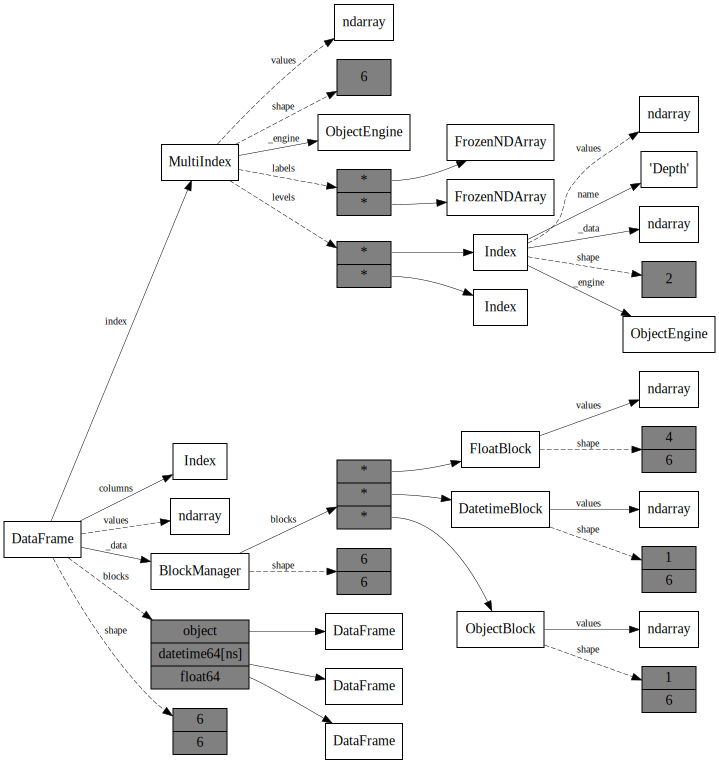

In [147]:
import graphviz
with open("df.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="svg")


In [92]:
df_soil.columns._engine.mapping.get_item("Date")

4

In [93]:
s = df_soil["Dens"]
s.values.base is df_soil._data.blocks[0].values

True

In [94]:
print df_soil[["Dens"]]._data.blocks[0].values.base

None


In [98]:
df_float = df_soil[['pH', 'Dens', 'Ca', 'Conduc']]
df_float.values.base is df_float._data.blocks[0].values

True

In [99]:
df_float.loc["0-10", "Top"].values.base is df_float._data.blocks[0].values

True

In [100]:
df_soil.values.dtype

dtype('O')